In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../data/raw/bike_buyers.csv')

df.shape

(1000, 13)

In [4]:
df.head(10)

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes
5,13507,Married,Female,10000.0,2.0,Partial College,Manual,Yes,0.0,1-2 Miles,Europe,50.0,No
6,27974,Single,Male,160000.0,2.0,High School,Management,NaN,4.0,0-1 Miles,Pacific,33.0,Yes
7,19364,Married,Male,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,43.0,Yes
8,22155,NaN,Male,20000.0,2.0,Partial High School,Clerical,Yes,2.0,5-10 Miles,Pacific,58.0,No
9,19280,Married,Male,NaN,2.0,Partial College,Manual,Yes,1.0,0-1 Miles,Europe,NaN,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    993 non-null    object 
 2   Gender            989 non-null    object 
 3   Income            994 non-null    float64
 4   Children          992 non-null    float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        996 non-null    object 
 8   Cars              991 non-null    float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               992 non-null    float64
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


In [6]:
df.drop("ID", axis=1).describe()

,Income,Children,Cars,Age
count,994.000000,992.000000,991.000000,992.000000
mean,56267.605634,1.910282,1.455096,44.181452
std,31067.817462,1.626910,1.121755,11.362007
min,10000.000000,0.000000,0.000000,25.000000
25%,30000.000000,0.000000,1.000000,35.000000
50%,60000.000000,2.000000,1.000000,43.000000
75%,70000.000000,3.000000,2.000000,52.000000
max,170000.000000,5.000000,4.000000,89.000000


In [7]:
cat_cols = df.select_dtypes(include="object")

for col in cat_cols:
    df_var = pd.DataFrame(df[col].value_counts())
    df_var.columns = ["freq_abs"]

    df_var["freq_rel"] = df_var["freq_abs"]/len(df)
    df_var["freq_rel_%"] = df_var["freq_rel"]*100

    display(df_var)

,freq_abs,freq_rel,freq_rel_%
Marital Status,,,
Married,535,0.535,53.5
Single,458,0.458,45.8


,freq_abs,freq_rel,freq_rel_%
Gender,,,
Male,500,0.500,50.0
Female,489,0.489,48.9


,freq_abs,freq_rel,freq_rel_%
Education,,,
Bachelors,306,0.306,30.6
Partial College,265,0.265,26.5
High School,179,0.179,17.9
Graduate Degree,174,0.174,17.4
Partial High School,76,0.076,7.6


,freq_abs,freq_rel,freq_rel_%
Occupation,,,
Professional,276,0.276,27.6
Skilled Manual,255,0.255,25.5
Clerical,177,0.177,17.7
Management,173,0.173,17.3
Manual,119,0.119,11.9


,freq_abs,freq_rel,freq_rel_%
Home Owner,,,
Yes,682,0.682,68.2
No,314,0.314,31.4


,freq_abs,freq_rel,freq_rel_%
Commute Distance,,,
0-1 Miles,366,0.366,36.6
5-10 Miles,192,0.192,19.2
1-2 Miles,169,0.169,16.9
2-5 Miles,162,0.162,16.2
10+ Miles,111,0.111,11.1


,freq_abs,freq_rel,freq_rel_%
Region,,,
North America,508,0.508,50.8
Europe,300,0.300,30.0
Pacific,192,0.192,19.2


,freq_abs,freq_rel,freq_rel_%
Purchased Bike,,,
No,519,0.519,51.9
Yes,481,0.481,48.1


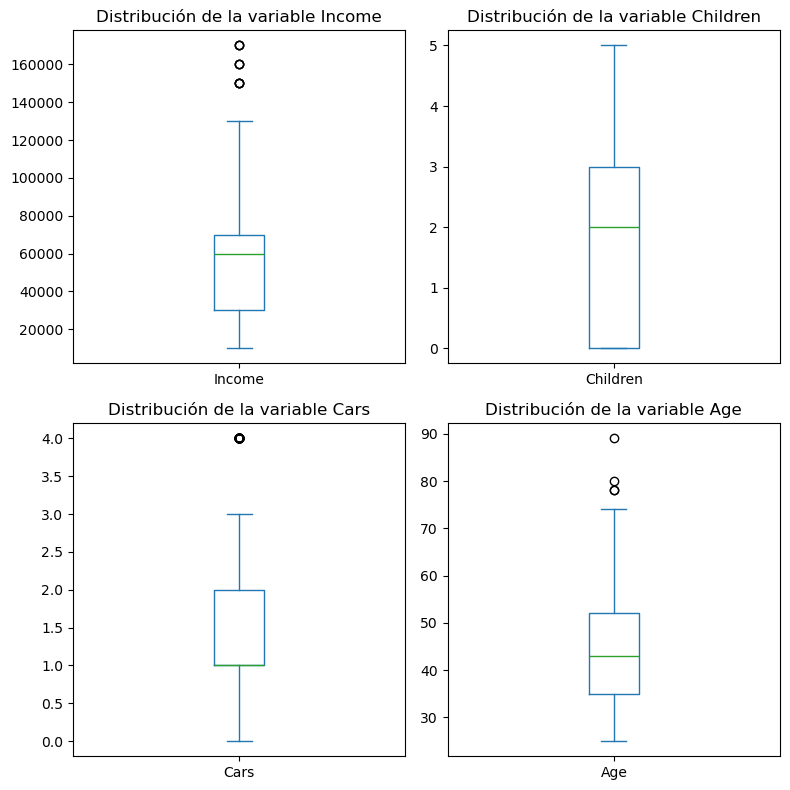

In [8]:
num_cols = df.select_dtypes(include=['int64', 'float64']).drop("ID", axis=1).columns.tolist()

n = len(num_cols)
ncols = 2
nrows = (n + ncols - 1) // ncols

fig, axes = plt.subplots(ncols=ncols,nrows=nrows,figsize=(4*ncols, 4*nrows))

axes = axes.flatten() if isinstance(axes, (list, np.ndarray)) else [axes]

for ax, col in zip(axes, num_cols):
    df[col].plot(kind='box', ax=ax)
    ax.set_title(f"Distribución de la variable {col}")


# hide any unused axes
for ax in axes[len(num_cols):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

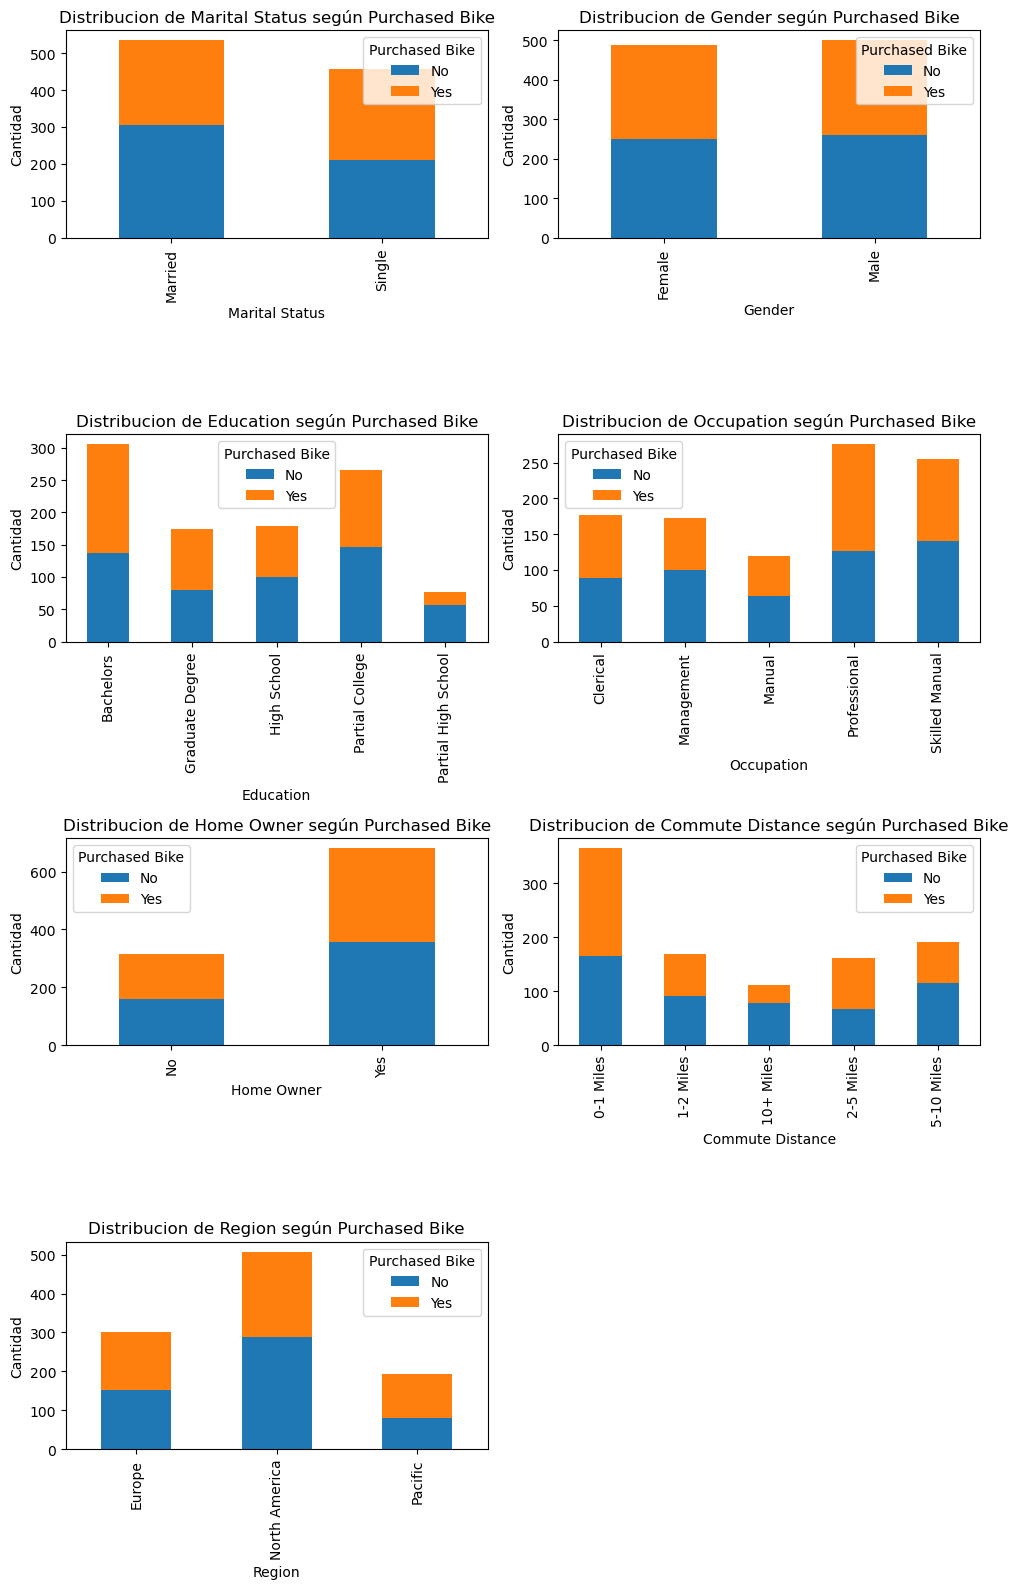

In [9]:

target_var = "Purchased Bike"
cat_cols = df.select_dtypes(include=['object']).drop(target_var, axis=1).columns.tolist()
# create a subplot grid that fits all categorical columns
n = len(cat_cols)
ncols = 2
nrows = (n + ncols - 1) // ncols
fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 4 * nrows))

# ensure axes is a flat array for easy indexing
axes = axes.flatten() if isinstance(axes, (list, np.ndarray)) else [axes]

for ax, col in zip(axes, cat_cols):
    crosstab_data = pd.crosstab(df[col], df[target_var])
    crosstab_data.plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(f'Distribucion de {col} según {target_var}')
    ax.set_xlabel(col)
    ax.set_ylabel('Cantidad')
    ax.legend(title=target_var)

# hide any unused axes
for ax in axes[len(cat_cols):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

In [10]:
# Verificar la cantidad de valores na
df.isna().sum()

ID                   0
Marital Status       7
Gender              11
Income               6
Children             8
Education            0
Occupation           0
Home Owner           4
Cars                 9
Commute Distance     0
Region               0
Age                  8
Purchased Bike       0
dtype: int64

In [11]:
df_clean = df.copy()

# Imputaremos valores usando SimpleImputer
num_imputer = SimpleImputer(strategy="median")
cat_imputer = SimpleImputer(strategy="most_frequent")

# Separamos los tipos de valores
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
cat_cols = df.select_dtypes(include="object").columns

# Implementamos el imputador
df_clean[num_cols] = num_imputer.fit_transform(df_clean[num_cols])
df_clean[cat_cols] = cat_imputer.fit_transform(df_clean[cat_cols])

print("\nValores faltantes luego de la imputación")
print(df_clean.isna().sum())


Valores faltantes luego de la imputación
ID                  0
Marital Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Purchased Bike      0
dtype: int64


In [12]:
# Detectar outliers usando el método IQR para cada columna numérica
num_cols = df_clean.select_dtypes(include=['int64', 'float64']).drop("ID", axis=1).columns.tolist()

print("=" * 50)
print("ANÁLISIS DE OUTLIERS (Método IQR)")
print("=" * 50)

for col in num_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Definir límites
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identificar outliers
    outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)][col]
    
    print(f"\n{'=' * 50}")
    print(f"Columna: {col}")
    print(f"{'=' * 50}")
    print(f"Q1 (25%): {Q1}")
    print(f"Q3 (75%): {Q3}")
    print(f"IQR: {IQR}")
    print(f"Límite inferior: {lower_bound}")
    print(f"Límite superior: {upper_bound}")
    print(f"Cantidad de outliers: {len(outliers)} ({len(outliers)/len(df_clean)*100:.2f}%)")

print("=" * 50)

ANÁLISIS DE OUTLIERS (Método IQR)

Columna: Income
Q1 (25%): 30000.0
Q3 (75%): 70000.0
IQR: 40000.0
Límite inferior: -30000.0
Límite superior: 130000.0
Cantidad de outliers: 10 (1.00%)

Columna: Children
Q1 (25%): 0.0
Q3 (75%): 3.0
IQR: 3.0
Límite inferior: -4.5
Límite superior: 7.5
Cantidad de outliers: 0 (0.00%)

Columna: Cars
Q1 (25%): 1.0
Q3 (75%): 2.0
IQR: 1.0
Límite inferior: -0.5
Límite superior: 3.5
Cantidad de outliers: 59 (5.90%)

Columna: Age
Q1 (25%): 35.0
Q3 (75%): 52.0
IQR: 17.0
Límite inferior: 9.5
Límite superior: 77.5
Cantidad de outliers: 4 (0.40%)


In [13]:
# Aplicar Winsorización usando método IQR (más efectivo)
num_cols = df_clean.select_dtypes(include=['int64', 'float64']).drop(["ID", "Cars"], axis=1).columns.tolist()

print("Tratamiento de outliers con Winsorización (método IQR):")
print("="*60)

for col in num_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers_before = ((df_clean[col] < lower) | (df_clean[col] > upper)).sum()
    
    df_clean[col] = np.clip(df_clean[col], lower, upper)
    
    outliers_after = ((df_clean[col] < lower) | (df_clean[col] > upper)).sum()
    
    print(f"{col}:")
    print(f"  Outliers antes: {outliers_before}")
    print(f"  Outliers después: {outliers_after}")
    print(f"  Límites: [{lower:.2f}, {upper:.2f}]")
    print()

print("="*60)

Tratamiento de outliers con Winsorización (método IQR):
Income:
  Outliers antes: 10
  Outliers después: 0
  Límites: [-30000.00, 130000.00]

Children:
  Outliers antes: 0
  Outliers después: 0
  Límites: [-4.50, 7.50]

Age:
  Outliers antes: 4
  Outliers después: 0
  Límites: [9.50, 77.50]



## Construccion de datos

In [14]:
# Creamos una columna para agrupar a los compradores por tiers de income
bins = [0, 30000, 80000, np.inf]
labels = ['Low', 'Medium', 'High']
df['Income_Group'] = pd.cut(df['Income'], bins=bins, labels=labels, right=False)

In [15]:
# Creamos un ratio de dependencia: ninos por poseedores de autos
df['Dependency_Ratio'] = df['Children'] / (df['Cars'] + 1)

In [16]:
# Creamos grupos de edades (binning)
bins_age = [0, 35, 55, np.inf]
labels_age = ['Young Adult', 'Middle-Aged', 'Senior']
df['Age_Group'] = pd.cut(df['Age'], bins=bins_age, labels=labels_age, right=False)

In [17]:
# Mapeamos la distancia de viaje a un punto medio numerico
commute_map = {
    '0-1 Miles': 0.5,
    '1-2 Miles': 1.5,
    '2-5 Miles': 3.5,
    '5-10 Miles': 7.5,
    '10+ Miles': 12.0 
}
df['Commute_Midpoint_Miles'] = df['Commute Distance'].map(commute_map)

In [18]:
# Binarizamos la columna (0/1)
df['Purchased Bike'] = df['Purchased Bike'].map({'Yes': 1, 'No': 0})
df['Home Owner'] = df['Home Owner'].map({'Yes': 1, 'No': 0})

In [19]:
# Hacemos un mapeo de nivel de educacion a valores enteros
# Esto facilita el entrenamiento posterior de los modelos.
education_mapping = {
    'Partial High School': 1,
    'High School': 2,
    'Partial College': 3,
    'Bachelors': 4,
    'Graduate': 5,
    'Post-Graduate': 6 
}

# Creamos una nueva columna para mantener la antigua por ahora
df['Education_Rank'] = df['Education'].map(education_mapping)

# Confirmamos el cambio
print(df[['Education', 'Education_Rank']].head())

         Education  Education_Rank
0        Bachelors             4.0
1  Partial College             3.0
2  Partial College             3.0
3        Bachelors             4.0
4        Bachelors             4.0
